In [4]:
spamd<-read.table("spamD.tsv",header=T,sep="\t")
spamTrain<-subset(spamd,spamd$rgroup>=10)
spamTest<-subset(spamd,spamd$rgroup<10)
spamVars<-setdiff(colnames(spamd),list('rgroup','spam'))
spamFormula<-as.formula(paste('spam=="spam"',paste(spamVars,collapse='+'),sep='~'))
spamModel<-glm(spamFormula,data=spamTrain,family=binomial(link='logit'))
spamTrain$pred<-predict(spamModel,newdata=spamTrain,type='response')
spamTest$pred<-predict(spamModel,newdata=spamTest,type='response')
print(with(spamTest,table(y=spam,glmPred=pred>=0.5)))


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


          glmPred
y          FALSE TRUE
  non-spam   264   14
  spam        22  158


Evaluating classification Model

Confusion Matrix

In [5]:
cM<-table(truth=spamTest$spam,prediction=spamTest$pred>0.5)
print(cM)


          prediction
truth      FALSE TRUE
  non-spam   264   14
  spam        22  158


Accuracy

In [6]:
   k<-(cM[1,1]+cM[2,2])/sum(cM)
   k

[1] 0.9213974

Precision

In [8]:
pre<-cM[2,2]/(cM[2,2]+cM[1,2])
pre

[1] 0.9186047

Recall

In [10]:
Rec<-cM[2,2]/ (cM[2,2]+cM[2,1])
Rec

[1] 0.8777778

F1 score

In [12]:
fscore<-(2*pre*Rec)/(Rec+pre)
fscore

[1] 0.8977273

Specificity

In [16]:
specf<-(cM[2,2])/(cM[2,2]+cM[1,2])
specf

[1] 0.9186047

Evaluating Scoring Models

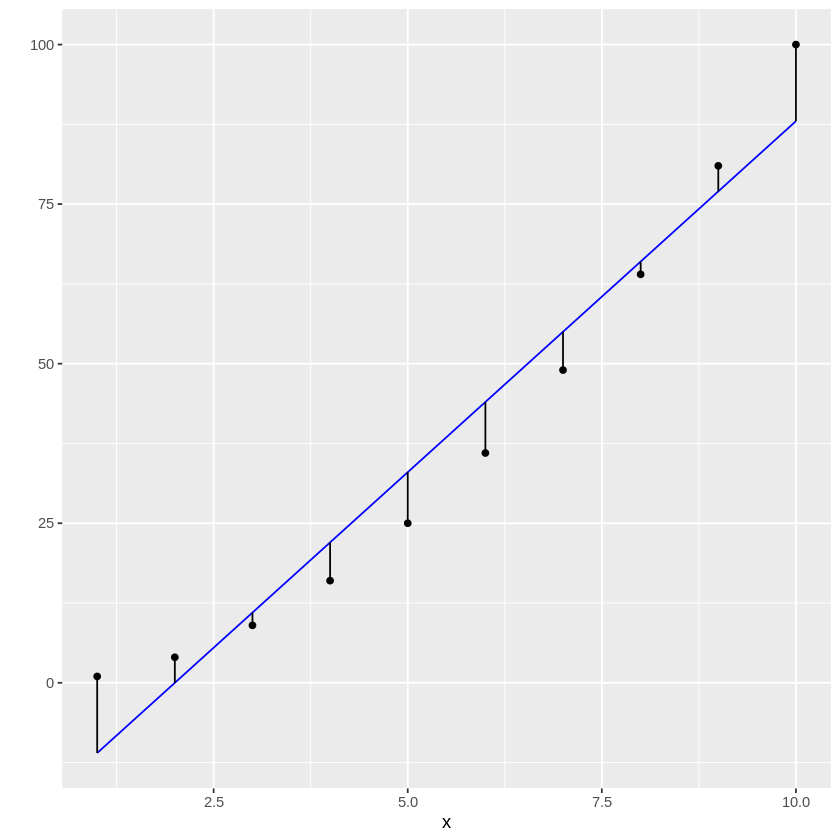

In [22]:
y=(1:10)^2
x=(1:10)
d<-data.frame(y,x)
model<-lm(y~x,data=d)
d$prediction<-predict(model,newdata=d)
library("ggplot2")
ggplot(data=d)+geom_point(aes(x=x,y=y))+geom_line(aes(x=x,y=prediction),color='blue')+geom_segment(aes(x=x,y=prediction,yend=y,xend=x))+scale_y_continuous('')


Root Mean Square Error

In [23]:

rmse<-sqrt(mean(d$prediction-y)^2)
rmse

[1] 1.421259e-15

R squared

In [25]:
Rsquared<-1-sum((d$prediction-d$y)^2)/sum((mean(d$y)-
d$y)^2)
Rsquared

[1] 0.9497645

Correlation


cor(x, y, method = c("pearson", "kendall", "spearman"))

In [29]:
co<-cor(x,y,method="pearson")
co

[1] 0.9745586

Absolute Error

In [30]:
abserror<-(sum(abs(d$prediction-d$y)))
abserror

[1] 64

Mean Absolute error

In [31]:
meanabster<-(sum(abs(d$prediction-d$y))/length(d$y))
meanabster

[1] 6.4

Relative absolute error

In [32]:
relabserr<-(sum(abs(d$prediction-d$y))/sum(abs(d$y))) 
relabserr

[1] 0.1662338